# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

### Column Names (characteristics) and their Significance

**Patientid**: This is the unique identifier of a patient.

**AppointmentID**: This helps us identify the patient's appointment.

**Gender**: This indicates if the patient is a female or male.

**ScheduledDay**: This tells us what day the appointment was registered i.e the day the patient set up their appointment.

**AppointmentDay**: This indiactes when the patient has to show up at the hospital i.e vist the doctor.

**Age**: This lets us know the age of the patient.

**Neighbourhood**: This tells us the location of the hospital.

**Scholarship**: This tells us if a patient is enrolled in a scholarship welfare program called "Bolsa Família". Bolsa Família gives financial aid to poor Brazilian families. 0 is False and 1 is True.

**Hipertension**: This tells us of the patient has hypertension or not. 0 is False and 1 is True.

**Diabetes**: This tells us if the patient has diabetes or not. 0 is False and 1 is True.

**Alcoholism**: This tells us if the person is into alcoholism or not. 0 is False and 1 is True.

**Handicap**: This tells us if the patient has a disability (is handicapped). 0 is False and 1 is True.

**SMS_received**: This tells us if the patient received the SMS reminder. 0 is False and 1 is True.

**No-show**: This lets us know if the patient went for their appointment with the doctor or not. ‘No’ means the patient showed up for their appointment, while ‘Yes’ meant they did not show up for their appointment.

 

### Question(s) for Analysis
The following are questions that I plan to explore:

1) What is the proportion of patients who showed up compared to those who didn't show up on their appointment day?

2) What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

- Is alcoholism a contributing factor to a patient's absence?

- Does having a scholarship affect whether the patient will show up or not?

- Does having hypertension affect the patient's absence?

- Does being handicapped affect the patient's absence?

- Does having diabetes affect the patient's absence?

- Does the SMS reminder sent to each patients reduce their ability be absent? 

- Does the patient's gender affect their ability to be absent? Which gender visits the hospital more on their appointment day? Which gender is more health concious

- Is age a contributing factor to a patient's absence?


In [1]:
#Import all important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#The magic word ensures that the visualizations are plotted inline with the jupyter notebook. See this page for more:
#http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#load the dataset into a pandas dataframe
data = pd.read_csv(r"C:\Users\User\Downloads\Moyin\UDACITY - DATA ANALYST NANODEGREE\PROJECT 1\noshowappointments-kagglev2-may-2016.csv", )

#view the dataframe
data.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#How many rows and columns are in the dataset?
data.shape

(110527, 14)

In [4]:
#How many rows (entries) are in the dataset?
data.shape[0]

110527

**There are 110527 rows and 14 columns in the dataset**

In [5]:
#View a concise summary of the 'Data' dataframe including the number of non-null values in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the output above, we can see that come column names are not spelled correctly. For example: "Hipertension" instead of "Hypertension", "Handcap" instead of "Handicapped".
We can also see that the following column names need to be renamed as they are not properly represented:
- PatientId
- AppointmentID
- ScheduledDay
- AppointmentDay
- No-show  

In [6]:
#View the datatypes of each column in the dataframe
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

The data types of the following columns need to be formatted as they are not in the right format:
- PatientId is in numerical format instead of object/string format
- AppointmentID is in numerical format instead of object/string format
- ScheduledDay is in object format insead of datetime format
- AppointmentDay is in object format insead of datetime format

In [7]:
#View the number of unique values in each column
data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
#Get useful descriptive statistics for each column of the dataframe
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- Less than 25% of patients received SMS reminders
- Less than 25% of patients have hypertension
- Less than 25% of patients have Diabetes
- Less than 25% of patients are into Alcoholism

Age Distribution of patients:
- We have a total number of 110527 patients in the dataset 
- 25% of the 110527 patients are under 18 years old
- 25% of the 110527 patients are over 55 years old
- 37 years old is the average age of patients
- We have a negative value as the minimum age (-1), this means that there are outliers in our dataset and such values need to be dropped.
- 115 mis the maximum age in the dataset

"Handcap" Column: (wrong spelling)
- Less than 25% of patients are "Handicapped"
- The Handcap column should be either 1 0r 0 but it has a maximum value of 4. We can infere that there are outliers in the Handcap column

"PatientId" and "AppointmentID" should not be numerical columns

In [9]:
#Check if there are missing values in each column of the dataframe
data.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no missing values in each column of the dataframe

In [10]:
#Check if there are any duplicate rows in the dataframe
data.duplicated().sum()

0

There are no duplicaterows in the dataset

### Data Cleaning

**Rename the column names and correct spelling errors**

Below, I will rename the column names and correcting spelling errors where necessary.

In [11]:
#rename columns
data.rename(columns = {'No-show':'No_show', 'Hipertension':'Hypertension', 'PatientId':'Patient_ID',
                       'AppointmentID':'Appointment_ID', 'ScheduledDay':'Scheduled_Day', 'AppointmentDay':'Appointment_Day', 'Handcap':'Handicapped'}, inplace = True)
data

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


**During the data assessment stage, i noticed some columns were in the wrong data format. Hence, i will go ahead to correct the data types of the following columns**
- PatientId 
- AppointmentID 
- ScheduledDay 
- AppointmentDay

In [12]:
#Convert from numerical data type to strings
data = data.astype({"Patient_ID": str})
data = data.astype({"Appointment_ID": str})
data.dtypes

Patient_ID         object
Appointment_ID     object
Gender             object
Scheduled_Day      object
Appointment_Day    object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
Handicapped         int64
SMS_received        int64
No_show            object
dtype: object

Parent_ID and Appointment_ID columns have now been converted from numerical datatype to string (object) data type.

In [13]:
#convert from string data type todatetime format
data['Scheduled_Day']= pd.to_datetime(data['Scheduled_Day'])
data['Appointment_Day']= pd.to_datetime(data['Appointment_Day'])
data.dtypes

Patient_ID                      object
Appointment_ID                  object
Gender                          object
Scheduled_Day      datetime64[ns, UTC]
Appointment_Day    datetime64[ns, UTC]
Age                              int64
Neighbourhood                   object
Scholarship                      int64
Hypertension                     int64
Diabetes                         int64
Alcoholism                       int64
Handicapped                      int64
SMS_received                     int64
No_show                         object
dtype: object

Scheduled_Day and Appointment_Day columns have now been converted from object (string) data type to datetime data type.

**Let's have a further look at the Age column in the dataframe. Are there any outliers?**

**Univariate analysis on the Age variable:** An Histogram will be plotted below to display the age distribution of patients in the dataset.

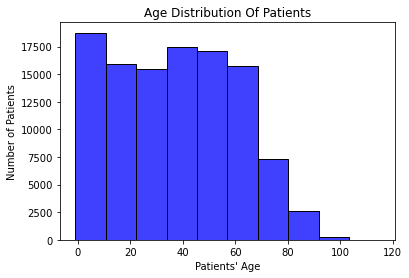

In [14]:
#plot histogram for univariate analysis where
sns.histplot(x = data['Age'], bins = 10, color = 'b')
plt.xlabel("Patients' Age")
plt.ylabel("Number of Patients")
plt.title('Age Distribution Of Patients')
plt.show()

**The histogram shows that the minimum age in the dataset is less than zero (0) and the maximum age is greater than 100 years**. This means that we have a negative value in our dataset.

In [15]:
data['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Age Distribution of patients:
- We have a total number of 110527 patients in the dataframe 
- 25% of the 110527 patients are under 18 years old
- 25% of the 110527 patients are over 55 years old
- 37 years old is the average age of patients
- We have a negative value as the minimum age (-1), this means that there are outliers in our dataset and such values need to be dropped.
- 115 mis the maximum age in the dataframe

**Remove outliers in the "Age" column and create a new dataframe called "Data_Cleaned"**

**Reason: This is due to the fact that we have a negative value as the minimum age (-1). This is wrong logically as the human age starts from 1 year old.
This also means that there are outliers in our dataset and such values need to be dropped.**

I will proceed to remove rows containing ages that are less than 1 year old in the dataet below. 

In [16]:
#Create a new variable
data_cleaned = data[data['Age'] >1]
data_cleaned

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735.0,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893.0,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557.0,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


A new dataset called "data_cleaned" has now been created after removing the outliers

In [17]:
data_cleaned['Age'].describe()

count    104714.000000
mean         39.126096
std          22.018268
min           2.000000
25%          21.000000
50%          39.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

After removing the rows containing ages less than 1 in the age column, we now have the following:
- A total number of 104714 patients in the dataframe 
- 25% of the 104714 patients are under 21 years old
- 25% of the 104714 patients are over 56 years old
- 39 years old is the average age of patients
- 2 years old is the minimum age in the dataframe
- 115 years old is the maximum age in the dataframe

**Get useful descriptive statistics for each column in the newly cleaned dataframe (data_cleaned)**

In [18]:
data_cleaned.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received
count,104714.000000,104714.000000,104714.000000,104714.000000,104714.000000,104714.000000,104714.000000
mean,39.126096,0.102441,0.208196,0.075845,0.032087,0.023464,0.324875
std,22.018268,0.303229,0.406019,0.264751,0.176233,0.165824,0.468331
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**The descriptive statistics above shows that the Handicapped column has a maximum value of 4 unlike the other boolean columns which all have 1 as their maximum value. Let's have a further look into the Handicapped column by getting a list of the unique values in the column.**

In [19]:
list(data['Handicapped'].unique()) 

[0, 1, 2, 3, 4]

From the cell above, we can see that there are 5 unique values in the Handicapped column.

**Remove the outliers from "Handicapped" column**

**Reason**: The Handicapped column is supposed to be a boolean column interpreting True (1) or False (0) but we currently have 5 unique values in the column. Therefore, we will be removing the values that are NOT less than or equal to 1

In [20]:
#remove outliers in handicapped column
data_cleaned = data_cleaned[data_cleaned['Handicapped'] <=1]
data_cleaned

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735.0,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893.0,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557.0,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


**View a concise summary of the cleaned 'Data_cleaned' dataframe including the number of non-null values in each column**

In [21]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104515 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   Patient_ID       104515 non-null  object             
 1   Appointment_ID   104515 non-null  object             
 2   Gender           104515 non-null  object             
 3   Scheduled_Day    104515 non-null  datetime64[ns, UTC]
 4   Appointment_Day  104515 non-null  datetime64[ns, UTC]
 5   Age              104515 non-null  int64              
 6   Neighbourhood    104515 non-null  object             
 7   Scholarship      104515 non-null  int64              
 8   Hypertension     104515 non-null  int64              
 9   Diabetes         104515 non-null  int64              
 10  Alcoholism       104515 non-null  int64              
 11  Handicapped      104515 non-null  int64              
 12  SMS_received     104515 non-null  int64              
 13 

**Get useful descriptive statistics for each column after removing the outliers from the Handicapped column**

In [22]:
data_cleaned.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received
count,104515.000000,104515.000000,104515.000000,104515.000000,104515.000000,104515.000000,104515.000000
mean,39.110482,0.102464,0.207779,0.075578,0.032072,0.019519,0.325044
std,22.004496,0.303259,0.405720,0.264322,0.176192,0.138340,0.468394
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After removing the outliers, the Handicapped column now has a maximum value of 1 and the total number of patients has reduced to 104515 patients

**View the unique values in the Handicapped column**

In [23]:
list(data_cleaned['Handicapped'].unique())

[0, 1]

The Handicapped column is now similar to the other boolean columns as We now have two unqiue values in the Handicapped column which are 1 and 0 interpreting as True and False respectively.

**The final step in the data cleanng process is to replace the 1 and 0 values with "True" and "False" respectively in the following columns in the "data_cleaned" dataframe:**
- Alcoholism
- Scholarship
- Hypertension
- Diabetes
- Handicapped
- SMS_received

In [24]:
data_cleaned['Alcoholism'] = data_cleaned['Alcoholism'].map({1: True, 0: False})
data_cleaned['Scholarship'] = data_cleaned['Scholarship'].map({1: True, 0: False})
data_cleaned['Hypertension'] = data_cleaned['Hypertension'].map({1: True, 0: False})
data_cleaned['Diabetes'] = data_cleaned['Diabetes'].map({1: True, 0: False})
data_cleaned['Handicapped'] = data_cleaned['Handicapped'].map({1: True, 0: False})
data_cleaned['SMS_received'] = data_cleaned['SMS_received'].map({1: True, 0: False})
data_cleaned

C:\Users\User\AppData\Local\Temp/ipykernel_19812/674139896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Alcoholism'] = data_cleaned['Alcoholism'].map({1: True, 0: False})
C:\Users\User\AppData\Local\Temp/ipykernel_19812/674139896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Scholarship'] = data_cleaned['Scholarship'].map({1: True, 0: False})
C:\Users\User\AppData\Local\Temp/ipykernel_19812/674139896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,False,False,False,False,False,True,No
110523,3596266328735.0,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,False,False,False,False,False,True,No
110524,15576631729893.0,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,False,False,False,False,False,True,No
110525,92134931435557.0,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,False,False,False,False,False,True,No


**And also replace the 'F' and 'M' values with 'Female' and 'Male' respectively in the gender column**

In [25]:
data_cleaned['Gender'] = data_cleaned['Gender'].map({'F': 'Female', 'M': 'Male'})
data_cleaned

C:\Users\User\AppData\Local\Temp/ipykernel_19812/374057431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Gender'] = data_cleaned['Gender'].map({'F': 'Female', 'M': 'Male'})


,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
0,29872499824296.0,5642903,Female,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,558997776694438.0,5642503,Male,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,4262962299951.0,5642549,Female,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,867951213174.0,5642828,Female,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,8841186448183.0,5642494,Female,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,Female,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,False,False,False,False,False,True,No
110523,3596266328735.0,5650093,Female,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,False,False,False,False,False,True,No
110524,15576631729893.0,5630692,Female,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,False,False,False,False,False,True,No
110525,92134931435557.0,5630323,Female,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,False,False,False,False,False,True,No


In [26]:
data_cleaned.describe()

,Age
count,104515.000000
mean,39.110482
std,22.004496
min,2.000000
25%,21.000000
50%,39.000000
75%,56.000000
max,115.000000


**The final descriptive statistics tells us the following about the patients' age column:**

**- We have a total number of 104515 patients in the dataframe** 

**- 25% of the 104515 patients are under 21 years old**

**- 25% of the 104515 patients are over 56 years old**

**- 39 years old is the average age of patients**

**- 2 years old is the minimum age in the dataframe**

**- 115 years old is the maximum age in the dataframe**

<a id='eda'></a>
## Exploratory Data Analysis

### What is gender distribution of patients in the cleaned dataset?

**Univariate Analysis on the gender variable:** An histogram will be plotted to display the number of males and females respectively

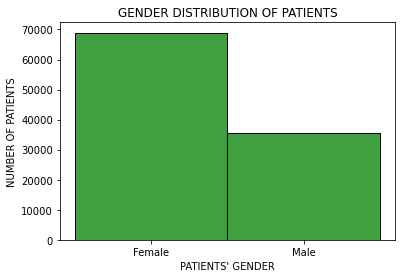

In [27]:
sns.histplot(x = data_cleaned['Gender'], stat = 'count', color = 'g')
plt.xlabel("PATIENTS' GENDER")
plt.ylabel("NUMBER OF PATIENTS")
plt.title('GENDER DISTRIBUTION OF PATIENTS')
plt.show()

The Gender distribution histogram above, show us that there are **approximately 68000 female patients and 37000 male patients** in the cleaned dataset

### What is age distribution of patients in the cleaned dataset?

**Univariate Analysis on the age variable:** An histogram will be plotted to display the age distribution of patients.

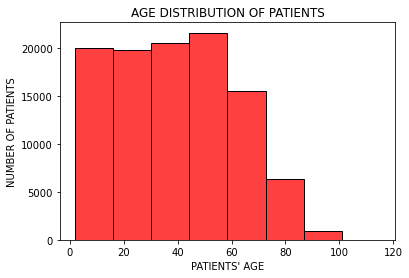

In [28]:
sns.histplot(x = data_cleaned['Age'], bins = 8, color ='r')
plt.xlabel("PATIENTS' AGE")
plt.ylabel("NUMBER OF PATIENTS")
plt.title('AGE DISTRIBUTION OF PATIENTS')
plt.show()

The Age distribution of patient's histogram plot above, shows that **majority of the patients (approximately 23,000 patients) are between the age of 40-58 years** while **only a few number of the patients are over 100 years old**. 

Approximately 15,000 patients are between age 62-72 years, 6,500 patients between 72-84 years.

There are more younger patients (2-58 years) than older patients (59-115 years) in the cleaned dataset.

### What is the realtionship between patients' age and gender distribution?

**Bivariate analysis on "No_show" variable and "Gender" variable**
-Use a boxplot to visualize the relationship between patients' "Gender" and "Age"

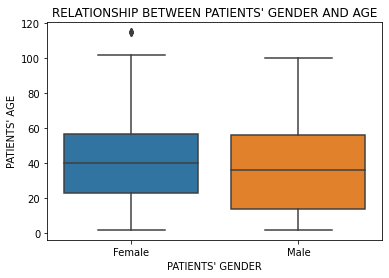

In [29]:
sns.boxplot(y = data_cleaned['Age'], x = data_cleaned['Gender'])
plt.xlabel("PATIENTS' GENDER")
plt.ylabel("PATIENTS' AGE")
plt.title("RELATIONSHIP BETWEEN PATIENTS' GENDER AND AGE")
plt.show()

**The boxplot above tells us the following:**

**FOR FEMALE**
- Medain age: 50% of females were 40 years old
- Inter-quartile range: Between 25-55 years old
- Upper quartile: 75% of females were 55 years old and below
- Lower quartile: 25% of females were 25 years old and below
- Upper whisker: Between 55-105 years old
- Lower whisker: Between 5-25 years old
- A few of the women are older than 100 years old

**FOR MALE**
- Medain age: 50% of males were around 35 years old
- Inter-quartile range: Between 10-54 years old
- Upper quartile: 75% of males were around 54 years old and below
- Lower quartile: 25% of males were around 10 years old and below
- Upper whisker: Between 54-98 years old
- Lower whisker: Between 5-10 years old

### Research Question 1: What is the proportion of people who showed up compared to those who didn't show up on their appointment day?

**Univariate Analysis on the age variable:** An histogram will be plotted to display the attendance of patients

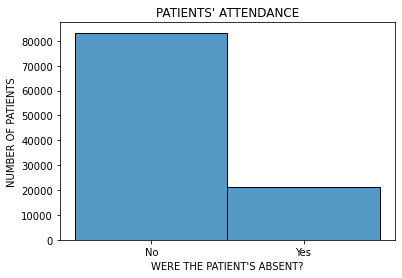

In [30]:
sns.histplot(x = data_cleaned['No_show'])
plt.xlabel("WERE THE PATIENT'S ABSENT?")
plt.ylabel("NUMBER OF PATIENTS")
plt.title("PATIENTS' ATTENDANCE")
plt.show()

**We can deduce the following from the histogram above:**

**'No_show' value is 'No': Over 80000 patients showed up to the hospital on their appointment day.**

**'No_show' value is 'Yes': Approximately 20000 patientsdid not show up to the hospital on their appointment day.**

In [31]:
#Get the patients' attandance distribution
data_cleaned['No_show'].value_counts(normalize = True)

No     0.796929
Yes    0.203071
Name: No_show, dtype: float64

**'No_show' value is 'No': The proportion of people who showed up to the hospital on their appointment day is 0.796929 which is approximately 80%.**

**'No_show' value is Yes: The proportion of people who did not show up to the hospital on their appointment day is 0.203071 which is approxinately 20%.**
This means that we have a larger percentage of people showing up for their appointments. However, what might have happened to 20% absentees?

Being able to count values in your dataset is an important step in better understanding the distribution of your data.

source: https://datagy.io/pandas-value-counts/#:~:text=Being%20able%20to%20count%20values,to%20fine-tune%20your%20analysis.

**A barplot is used below to visualize the proportion of patients' attendance**

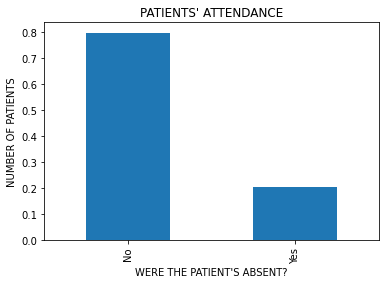

In [32]:
data_cleaned['No_show'].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel("WERE THE PATIENT'S ABSENT?")
plt.ylabel("NUMBER OF PATIENTS")
plt.title("PATIENTS' ATTENDANCE")
plt.show()

**No_show is No = This means the patient was present on their appointment day.**

**No_show is Yes = This means that the patient was absent on their appointment day.**

**The patients' attendance barplot shows us the following:**

**'No_show' value is 'No': Approximately 0.8 proportion of patients i.e 80% showed up to the hospital on their appointment day.**

**'No_show' value is 'Yes': Approximately 0.2 proportion of patients i.e 20% did not show up to the hospital on their appointment day.**

### Research Question 2:  What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

### - Is alcoholism a contributing factor to a patient's absence?

**Bivariate analysis on "No_show" variable and "Alcoholism" variable**

- Group the "Alcoholism" column by "No_show" entries.
- Use value_counts to better understand the distribution of alcoholism based on the No_show entries.
- Use reset_index() to reset index of the "data_cleaned" dataframe object to default indexing. 

Read more about "reset_index.()" here:https://www.machinelearningplus.com/pandas/pandas-reset-index/#:~:text=reset_index%20in%20pandas%20is%20used,gets%20converted%20to%20a%20column.

**No_show is No = This means the patient was present on their appointment day.**

**No_show is Yes = This means that the patient was absent on their appointment day.**

In [33]:
data_cleaned.groupby(['No_show'])['Alcoholism'].value_counts(normalize = True).reset_index(name = 'Proportions')

,No_show,Alcoholism,Proportions
0,No,False,0.967860
1,No,True,0.032140
2,Yes,False,0.968196
3,Yes,True,0.031804


**After conducting a value count on patients' attendance based on/grouped by alcholism, we can deduce the following from the proportions output above:**
- **0.967860 proportion** of total patients **were not into alcoholism and were also present** at the hospital on their appointment day.
- **0.032140 proportion** of total patients **were into alcoholism and were also present** at the hospital on their appointment day.
- **0.968196 proportion** of total patients **were not into alcholism and were also absent** at the hospital on their appointment day.
- **0.031804 proportion** of total patients **were into alcholism and were also absent** at the hospital on their appointment day.

**I will proceed to define a function called "proportions" below so to avoid repeating the same code/instructions in for the other parameters that i will be analyzing.**

According to www.datacamp.com, "Functions are used in programming to bundle a set of instructions that you want to use repeatedly or that, because of their complexity, are better self-contained in a sub-program and called when needed. That means that a function is a piece of code written to carry out a specified task".
Source: https://www.datacamp.com/tutorial/functions-python-tutorial

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.HTTPException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

No_show  Alcoholism
No       False         0.967860
         True          0.032140
Yes      False         0.968196
         True          0.031804
Name: Alcoholism, dtype: float64


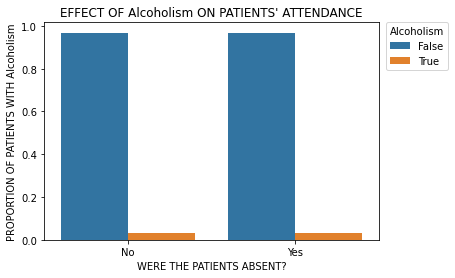

In [34]:
#define a function
def proportions (data, column):
    new_data = data.groupby('No_show')[column].value_counts(normalize = True)
    print(new_data)
    new_data = new_data.reset_index(name = 'Proportions')
    #create a barplot using seaborn plot for data visualization
    sns.barplot(x= 'No_show', y='Proportions', data = new_data, hue = column)
    plt.xlabel("WERE THE PATIENTS ABSENT?")
    plt.ylabel("PROPORTION OF PATIENTS WITH " + column)
    plt.title("EFFECT OF " + column + " ON PATIENTS' ATTENDANCE")
    plt.legend(title = column, fontsize = 'medium', title_fontsize = "10", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()
    
#call the "proportions" function to visualize "Alcoholism" as factor affecting "No_show"
proportions(data_cleaned, 'Alcoholism')

**The barplot of Patients' attendance against alcoholism shows us the following:**
- **Approximately 0.97 proportion** of total patients **were not into alcoholism and were also present** at the hospital on their appointment day.
- **Approximately 0.03 proportion** of total patients **were into alcoholism and were also present** at the hospital on their appointment day.
- **Approximately 0.97 proportion** of total patients **were not into alcholism and were also absent** at the hospital on their appointment day.
- **Approximately 0.03 proportion** of total patients **were into alcholism and were also absent** at the hospital on their appointment day.

### - Does having a scholarship affect whether the patient will show up or not?

**Bivariate analysis on "No_show" variable and "Scholarship" variable**
- call the "proportions" function to visualize "Scholarship" as a factor affecting "No_show" (patients' attendance)

No_show  Scholarship
No       False          0.902138
         True           0.097862
Yes      False          0.879476
         True           0.120524
Name: Scholarship, dtype: float64


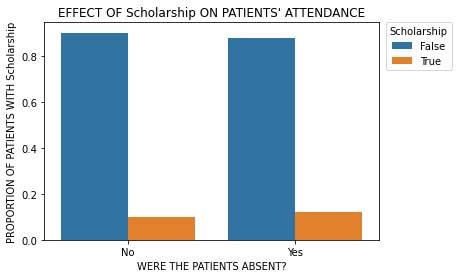

In [35]:
proportions(data_cleaned, 'Scholarship')

**After conducting a value count on patients' attendance based on having a scholarship, we can deduce the following from the proportions output above:**
- **0.902138 proportion** of total patients **did not have scholarship and were also present** at the hospital on their appointment day.
- **0.097862 proportion** of total patients **had scholarship and were also present** at the hospital on their appointment day.
- **0.879476 proportion** of total patients **did not have scholarship and were also absent** at the hospital on their appointment day.
- **0.120524 proportion** of total patients **had scholarship and were also absent** at the hospital on their appointment day.

**The barplot of Patients' attendance against having a scholarship shows us the following:**
- **Approximately 0.90 proportion** of total patients **did not have scholarship and were also present** at the hospital on their appointment day.
- **Approximately 0.10 proportion** of total patients **had scholarship and were also present** at the hospital on their appointment day.
- **Approximately 0.88 proportion** of total patients **did not have scholarship and were also absent** at the hospital on their appointment day.
- **Approximately 0.12 proportion** of total patients **had scholarship and were also absent** at the hospital on their appointment day.

### - Does having hypertension affect the patient's absence?

**Bivariate analysis on "No_show" variable and "Hypertension" variable**
- call the "proportions" function to visualize "Hypertension" as a factor affecting "No_show" (patients' attendance)

No_show  Hypertension
No       False           0.784274
         True            0.215726
Yes      False           0.823407
         True            0.176593
Name: Hypertension, dtype: float64


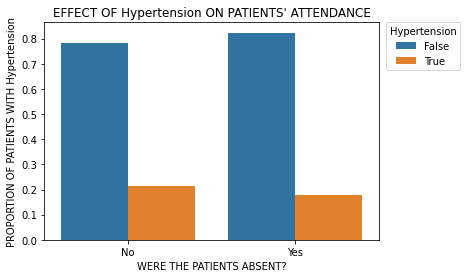

In [36]:
proportions(data_cleaned, 'Hypertension')

**After conducting a value count on patients' attendance based on having hypertension, we can deduce the following from the proportions output above:**
- **0.784274 proportion** of total patients **did not have hypertension and were also present** at the hospital on their appointment day.
- **0.215726 proportion** of total patients **had hypertension and were also present** at the hospital on their appointment day.
- **0.823407 proportion** of total patients **did not have hypertension and were also absent** at the hospital on their appointment day.
- **0.176593 proportion** of total patients **had hypertension and were also absent** at the hospital on their appointment day.

**The barplot of Patients' attendance against having hypertension shows us the following:**
- **Approximately 0.78 proportion** of total patients **did not have hypertension and were also present** at the hospital on their appointment day.
- **Approximately 0.22 proportion** of total patients **had hypertension and were also present** at the hospital on their appointment day.
- **Approximately 0.82 proportion** of total patients **did not have hypertension and were also absent** at the hospital on their appointment day.
- **Approximately 0.18 proportion** of total patients **had hypertension and were also absent** at the hospital on their appointment day.

### - Does being handicapped affect the patient's absence?

**Bivariate analysis on "No_show" variable and "Handicapped" variable**
- call the "proportions" function to visualize being "Handicapped" as a factor affecting "No_show" (patients' attendance)

No_show  Handicapped
No       False          0.979902
         True           0.020098
Yes      False          0.982755
         True           0.017245
Name: Handicapped, dtype: float64


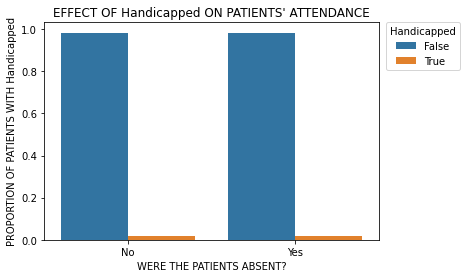

In [37]:
proportions(data_cleaned, 'Handicapped')

**After conducting a value count on patients' attendance based on being handicapped, we can deduce the following from the proportions output above:**
- **0.979902 proportion** of total patients **were not hadicapped and were also present** at the hospital on their appointment day.
- **0.020098 proportion** of total patients **were handicapped and were also present** at the hospital on their appointment day.
- **0.982755 proportion** of total patients **were not handicapped and were also absent** at the hospital on their appointment day.
- **0.017245 proportion** of total patients **were handicapped and were also absent** at the hospital on their appointment day.

**The barplot of Patients' attendance against being handicapped shows us the following:**
- **Approximately 0.98 proportion** of total patients **were not hadicapped and were also present** at the hospital on their appointment day.
- **Approximately 0.02 proportion** of total patients **were handicapped and were also present** at the hospital on their appointment day.
- **Approximately 0.98 proportion** of total patients **were not handicapped and were also absent** at the hospital on their appointment day.
- **Approximately 0.02 proportion** of total patients **were handicapped and were also absent** at the hospital on their appointment day.

### - Does having diabetes affect the patient's absence?

**Bivariate analysis on "No_show" variable and "Diabetes" variable**
- call the "proportions" function to visualize "Diabetes" as a factor affecting "No_show" (patients' attendance)

No_show  Diabetes
No       False       0.922224
         True        0.077776
Yes      False       0.933047
         True        0.066953
Name: Diabetes, dtype: float64


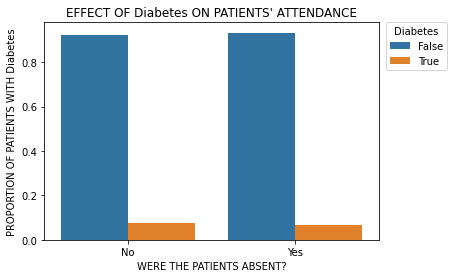

In [38]:
proportions(data_cleaned, 'Diabetes')

**After conducting a value count on patients' attendance based on having diabetes, we can deduce the following from the proportions output above:**
- **0.922224 proportion** of total patients **did not have diabetes and were also present** at the hospital on their appointment day.
- **0.077776 proportion** of total patients **had diabetes and were also present** at the hospital on their appointment day.
- **0.933047 proportion** of total patients **did not have diabetes and were also absent** at the hospital on their appointment day.
- **0.066953 proportion** of total patients **had diabetes and were also absent** at the hospital on their appointment day.

**The barplot of Patients' attendance against having diabetes shows us the following:**
- **Approximately 0.92 proportion** of total patients **did not have diabetes and were also present** at the hospital on their appointment day.
- **Approximately 0.08 proportion** of total patients **had diabetes and were also present** at the hospital on their appointment day.
- **Approximately 0.93 proportion** of total patients **did not have diabetes and were also absent** at the hospital on their appointment day.
- **Approximately 0.07 proportion** of total patients **had diabetes and were also absent** at the hospital on their appointment day.

### - Does the SMS reminder sent to each patients reduce their ability be absent?

**Bivariate analysis on "No_show" variable and "SMS_received" variable**
- call the "proportions" function to visualize "SMS_received" as a factor affecting "No_show" (patients' attendance)

No_show  SMS_received
No       False           0.704602
         True            0.295398
Yes      False           0.558613
         True            0.441387
Name: SMS_received, dtype: float64


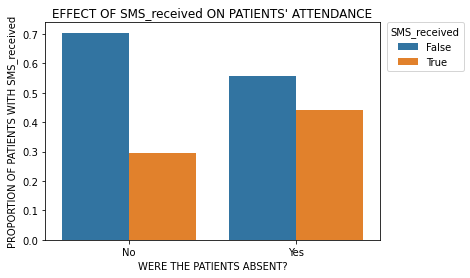

In [39]:
proportions(data_cleaned, 'SMS_received')

**After conducting a value count on patients' attendance based on receiving SMS, we can deduce the following from the proportions output above:**
- **0.704602 proportion** of total patients **did not receive SMS and were also present** at the hospital on their appointment day.
- **0.295398 proportion** of total patients **received SMS and were also present** at the hospital on their appointment day.
- **0.558613 proportion** of total patients **did not receive SMS and were also absent** at the hospital on their appointment day.
- **0.441387 proportion** of total patients **received SMS and were also absent** at the hospital on their appointment day.

**The barplot of Patients' attendance against receiving SMS shows us the following:**
- **Approximately 0.70 proportion** of total patients **did not receive SMS and were also present** at the hospital on their appointment day.
- **Approximately 0.29 proportion** of total patients **received SMS and were also present** at the hospital on their appointment day.
- **Approximately 0.56 proportion** of total patients **did not receive SMS and were also absent** at the hospital on their appointment day.
- **Approximately 0.44 proportion** of total patients **received SMS and were also absent** at the hospital on their appointment day.

### - Does the patient's gender affect their ability to be absent? Which gender visits the hospital more on their appointment day? Which gender is more health conscious?

**Bivariate analysis on "No_show" variable and "Gender" variable**
- Group the "Gender" column by "No_show" entries.
- Use value_counts to better understand the distribution of alcoholism based on the No_show entries.
- Use reset_index() to reset index of the "data_cleaned" dataframe object to default indexing. 

Read more about "reset_index.()" here:https://www.machinelearningplus.com/pandas/pandas-reset-index/#:~:text=reset_index%20in%20pandas%20is%20used,gets%20converted%20to%20a%20column.

- Use a barplot to visualize "Gender" as a factor affecting "No_show" (patients' attendance) i.e plot gender against no show

No_show  Gender
No       Female    0.658823
         Male      0.341177
Yes      Female    0.661845
         Male      0.338155
Name: Gender, dtype: float64


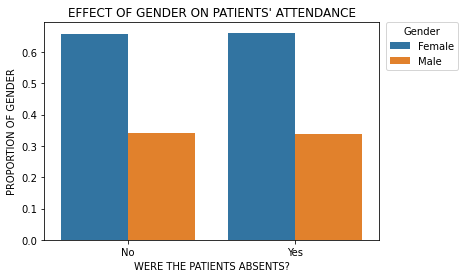

In [40]:
new_data = data_cleaned.groupby('No_show')['Gender'].value_counts(normalize = True)
print(new_data)
new_data = new_data.reset_index(name = 'Proportions')
#create a barplot using seaborn plot for data visualization
sns.barplot(x= 'No_show', y='Proportions', data = new_data, hue = 'Gender')
plt.xlabel("WERE THE PATIENTS ABSENTS?")
plt.ylabel("PROPORTION OF GENDER")
plt.title("EFFECT OF GENDER ON PATIENTS' ATTENDANCE")
plt.legend(title = 'Gender', fontsize = 'medium', title_fontsize = "10", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

**After conducting a value count on patients' attendance based on their gender, we can deduce the following from the proportions output above:**
- **0.658823 proportion** of total patients **were female and were also present** at the hospital on their appointment day.
- **0.341177 proportion** of total patients **were male and were also present** at the hospital on their appointment day.
- **0.661845 proportion** of total patients **were female and were also absent** at the hospital on their appointment day.
- **0.338155 proportion** of total patients **were male and were also absent** at the hospital on their appointment day.

**The barplot of Patients' attendance against their gender shows us the following:**
- **Approximately 0.66 proportion** of total patients **were female and were also present** at the hospital on their appointment day.
- **Approximately 0.34 proportion** of total patients **were male and were also present** at the hospital on their appointment day.
- **Approximately 0.66 proportion** of total patients **were female and were also absent** at the hospital on their appointment day.
- **Approximately 0.33 proportion** of total patients **were male and were also absent** at the hospital on their appointment day.

### - Is age a contributing factor to a patient's absence?

**Bivariate analysis on "No_show" variable and "Gender" variable**

Put age groups in categories from the minimum age 1 to the maximum age 115. 

Name the categories for the different age groups.

**CATEGORIES & AGE GROUPS**
- Child: 0-12 years old
- Teenager: 13-19 years old
- Young Adult: 20-35 years old
- Adult: 36-60 years old
- Old person: 61-150 years old

Add the new Categories to the dataframe.

Use a barplot to visualize age "Categories" as a factor affecting "No_show" (patients' attendance) i.e plot categories against no show.

In [41]:
#specify bins
bins= [0,12,19,35,60,150]
labels = ['Child','Teenager','Young_Adult','Adult','Old_person']
#create a new column for age categories
data_cleaned['age_categories'] = pd.cut(data_cleaned['Age'], bins=bins, labels=labels, right=False)
#View the first five rows of the updated dataframe
data_cleaned.head()

C:\Users\User\AppData\Local\Temp/ipykernel_19812/1772479569.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['age_categories'] = pd.cut(data_cleaned['Age'], bins=bins, labels=labels, right=False)


,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show,age_categories
0,29872499824296.0,5642903,Female,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,No,Old_person
1,558997776694438.0,5642503,Male,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,No,Adult
2,4262962299951.0,5642549,Female,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,No,Old_person
3,867951213174.0,5642828,Female,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No,Child
4,8841186448183.0,5642494,Female,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,No,Adult


**Get the proportion of the age categories using .value_counts()**

In [42]:
data_cleaned['age_categories'].value_counts(normalize = True)

Adult          0.360532
Young_Adult    0.217442
Old_person     0.201894
Child          0.135043
Teenager       0.085088
Name: age_categories, dtype: float64

**The value counts above shows the following:**
- **0.360532** proportion of the total patients are **Adults**
- **0.217442** proportion of the total patients are **Young Adults**
- **0.201894** proportion of the total patients are **Old People**
- **0.135043** proportion of the total patients are **Children**
- **0.085088** proportion of the total patients are **Teenagers**

In [43]:
#Group the "age_categories" column by "No_show" entries
#Use value_counts to better understand the distribution of age_categories based on the No_show entries
#Use reset_index() to reset index of the "data_cleaned" dataframe object to default indexing. 
age_distribution = data_cleaned.groupby(['No_show'])['age_categories'].value_counts(normalize = True).reset_index(name = 'proportions')
age_distribution

,No_show,level_1,proportions
0,No,Adult,0.365274
1,No,Old_person,0.214645
2,No,Young_Adult,0.207321
3,No,Child,0.133700
4,No,Teenager,0.079060
5,Yes,Adult,0.341924
6,Yes,Young_Adult,0.257162
7,Yes,Old_person,0.151856
8,Yes,Child,0.140313
9,Yes,Teenager,0.108745


**After conducting a value count on patients' attendance based on their age categories, we can deduce the following from the proportions output above:**
- **0.365274** proportion of the total patients were **Adults who were also present** at the hospital on their appointment day.
- **0.214645** proportion of the total patients were **Old people who were also present** at the hospital on their appointment day.
- **0.207321** proportion of the total patients were **Young Adults who were also present** at the hospital on their appointment day.
- **0.133700** proportion of the total patients were **Children who were also present** at the hospital on their appointment day.
- **0.079060** proportion of the total patients were **Teenagers who were also present** at the hospital on their appointment day.
- **0.341924** proportion of the total patients were **Adults who were also absent** at the hospital on their appointment day.
- **0.257162** proportion of the total patients were **Old people who were also absent** at the hospital on their appointment day.
- **0.151856** proportion of the total patients were **Young Adults who were also absent** at the hospital on their appointment day.
- **0.140313** proportion of the total patients were **Children who were also absent** at the hospital on their appointment day.
- **0.108745** proportion of the total patients were **Teenagers who were also absent** at the hospital on their appointment day.

**Plot a barchart showing the attendance of each age category**

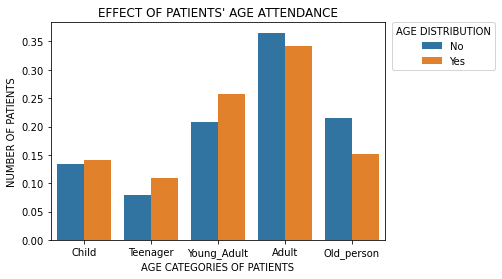

In [44]:
sns.barplot(x= 'level_1', y= 'proportions', data = age_distribution, hue= 'No_show')
plt.xlabel("AGE CATEGORIES OF PATIENTS")
plt.ylabel("NUMBER OF PATIENTS")
plt.title("EFFECT OF PATIENTS' AGE ATTENDANCE")
plt.legend(title = 'AGE DISTRIBUTION', fontsize = 'medium', title_fontsize = "10", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()    

**Barplot shows us that:**
- **Approximately 0.13** proportion of patients were **Children who were present** at the hospital on their appointment day.
- **Approximately 0.14** proportion of patients were **Children who were absent** at the hospital on their appointment day.
- **Approximately 0.08** proportion of patients were **Teenagers who were present** at the hospital on their appointment day.
- **Approximately 0.11** proportion of patients were **Teenagers who were absent** at the hospital on their appointment day.
- **Approximately 0.20** proportion of patients were **Young Adults who were present** at the hospital on their appointment day.
- **Approximately 0.15** proportion of patients were **Young Adults who were absent** at the hospital on their appointment day.
- **Approximately 0.37** proportion of patients were **Adults who were present** at the hospital on their appointment day.
- **Approximately 0.34** proportion of patients were **Adults who were absent** at the hospital on their appointment day.
- **Approximately 0.21** proportion of patients were **Old people who were present** at the hospital on their appointment day.
- **Approximately 0.26** proportion of patients were **Old people who were absent** at the hospital on their appointment day.

**For more insight, switch the parameters in the x and y axis. Meaning the age categories will be plotted against patients' attendance**

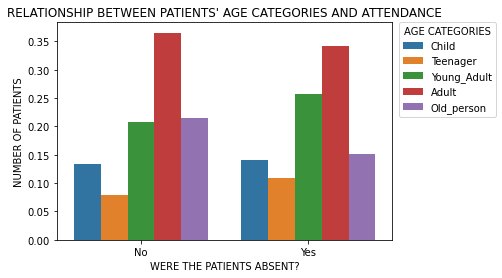

In [45]:
sns.barplot(x= 'No_show', y= 'proportions', data = age_distribution, hue= 'level_1')
plt.xlabel("WERE THE PATIENTS ABSENT?")
plt.ylabel("NUMBER OF PATIENTS")
plt.title("RELATIONSHIP BETWEEN PATIENTS' AGE CATEGORIES AND ATTENDANCE")
plt.legend(title = 'AGE CATEGORIES', fontsize = 'medium', title_fontsize = "10", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()  

**The barplot of Patients' attendance against their  shows us the following:**

- **Approximately 0.37** proportion of the total patients were **Adults who were also present** at the hospital on their appointment day.
- **Approximately 0.21** proportion of the total patients were **Old people who were also present** at the hospital on their appointment day.
- **Approximately 0.20** proportion of the total patients were **Young Adults who were also present** at the hospital on their appointment day.
- **Approximately 0.13** proportion of the total patients were **Children who were also present** at the hospital on their appointment day.
- **Approximately 0.08** proportion of the total patients were **Teenagers who were also present** at the hospital on their appointment day.
- **Approximately 0.34** proportion of the total patients were **Adults who were also absent** at the hospital on their appointment day.
- **Approximately 0.26** proportion of the total patients were **Old people who were also absent** at the hospital on their appointment day.
- **Approximately 0.15** proportion of the total patients were **Young Adults who were also absent** at the hospital on their appointment day.
- **Approximately 0.14** proportion of the total patients were **Children who were also absent** at the hospital on their appointment day.
- **Approximately 0.11** proportion of the total patients were **Teenagers who were also absent** at the hospital on their appointment day.

<a id='conclusions'></a>
## Conclusions

- **The proportion of patients who showed up for their appointment is 0.796929 (approximately 80% of the total population) while the proportion of patients who did not show up for their appointment is 0.203071 (approximately 20% of the total population)**

- **Being Handicapped, having diabetes or being into alcoholism do not affect a patients abiity to not show up for their appointment. From the analysis we could see that patients with these conditions were able to show up for their appointments.**

- **Hypertension slighty affects a patient's ability to show up at the hospital. From the analysis, the no-showers who had hypertension were more present than does who didnt.**

- **The proportion of female and male pateints that showed up and also did not show up are almost the same. This means that gender does not affect a patient's ability to be absent on their appointment day.**

- **From the analysis, we can see that women (females) visit the hospital more on their appointment day than men (males). Therefore this means that females are more health concious that males.**

- **SMS reminder does not significantly affect the patient's abilty to show up or not as patients who didn’t receive SMS showed up more than those who received the SMS reminder**

- **Age is a contributing factor to a patient's absense. From the analysis we can see that Adults and Old persons show up more during their appointment day i.e from age 36-60 (Adults) and age 60+ (Old persons) show up more.**
- **Teenagers (age 13 - 19) show up to their appointment the least, followed by children between the ages of 1 to 12.**

### Limitations

- We were not given information about each patients neighbourhood or address. The distance from a patient's neighbourhood to the hospital location could have been a contributing factor to their absence (no_show)